<a href="https://colab.research.google.com/github/Drona09/drona/blob/main/regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# importing packages
import numpy as np
import pandas as pd

In [5]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/Insurance_Premium_Prediction.csv')
df.head(10)

,Policy_ID,Age,Gender,Vehicle_Type,Driving_Experience_Years,Policy_Type,Claim_History,Annual_Income,City,Premium_Amount
0,bd5251b1-f9f0-4f20-96d5-385044b84d88,75.0,Male,Coupe,41,Premium,0,84043.996598,Suburban,3580.440690
1,f20dd8c9-5319-4cd4-b113-d61e735b4d4e,47.0,Female,Truck,10,Standard,1,66951.387922,Suburban,971.614083
2,3c915c11-ad8f-45ae-9412-510afe8131be,62.0,Male,Truck,7,Premium,1,57788.532217,Rural,1440.306222
3,7125eef2-39ea-410b-b5e8-ff8ae386e272,77.0,Male,Truck,34,Standard,0,38574.345604,Urban,2114.761067
4,0e7ba13d-9f59-4c5c-9c6a-8ae3e5c6e988,39.0,Female,SUV,29,Basic,0,35864.357483,Suburban,997.772498
5,c80cec2b-5793-444a-a911-887a9834fdb3,34.0,Female,Sedan,36,Standard,1,72667.948842,Urban,613.711778
6,280dc2c1-b28f-48c3-83c2-32762a63978e,19.0,Female,Truck,16,Premium,0,73726.435519,Suburban,1190.624798
7,34369be0-6e65-4468-aa24-e2c193110589,20.0,Female,Coupe,29,Standard,1,66447.463374,Rural,835.200973
8,1f4238e1-5f40-4052-852a-ce9a414b2085,65.0,Male,Sedan,42,Premium,1,64148.808355,Suburban,2419.177016
9,470b3e34-dbcb-4b98-9453-c674e37951a7,45.0,Female,Sedan,32,Premium,1,110563.685751,Urban,2664.717853


In [6]:
# See the no. of rows and columns
df.shape

(998, 10)

In [7]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Policy_ID', 'Age', 'Gender', 'Vehicle_Type', 'Driving_Experience_Years', 'Policy_Type', 'Claim_History', 'Annual_Income', 'City', 'Premium_Amount']


In [8]:
# Display data type of each feature
df.dtypes

,0
Policy_ID,object
Age,float64
Gender,object
Vehicle_Type,object
Driving_Experience_Years,int64
Policy_Type,object
Claim_History,int64
Annual_Income,float64
City,object
Premium_Amount,float64


In [9]:
df.describe()

,Age,Driving_Experience_Years,Claim_History,Annual_Income,Premium_Amount
count,953.000000,998.000000,998.000000,955.000000,998.000000
mean,47.371459,25.164329,0.524048,85259.954955,2765.929065
std,17.968299,14.085747,0.499672,38363.061232,1303.028839
min,18.000000,1.000000,0.000000,20013.178110,501.607234
25%,32.000000,12.000000,0.000000,52350.160420,1618.402622
50%,47.000000,25.000000,1.000000,86380.778450,2729.012250
75%,64.000000,37.000000,1.000000,119167.179525,3898.174255
max,79.000000,49.000000,1.000000,149691.280438,4998.257541


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Policy_ID                 998 non-null    object 
 1   Age                       953 non-null    float64
 2   Gender                    998 non-null    object 
 3   Vehicle_Type              952 non-null    object 
 4   Driving_Experience_Years  998 non-null    int64  
 5   Policy_Type               998 non-null    object 
 6   Claim_History             998 non-null    int64  
 7   Annual_Income             955 non-null    float64
 8   City                      998 non-null    object 
 9   Premium_Amount            998 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 78.1+ KB


In [11]:
# find the null values
df.isnull().sum()

,0
Policy_ID,0
Age,45
Gender,0
Vehicle_Type,46
Driving_Experience_Years,0
Policy_Type,0
Claim_History,0
Annual_Income,43
City,0
Premium_Amount,0


In [12]:
# Remove unwanted columns
df.drop(columns=['Policy_ID'], inplace=True)  # specify the columns to remove

In [13]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns
num_columns
cat_columns

Index(['Gender', 'Vehicle_Type', 'Policy_Type', 'City'], dtype='object')

In [14]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns_colu
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [15]:
# fill the missing values for numerical terms - mean
#df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [16]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [17]:
df.head(10)

,Age,Gender,Vehicle_Type,Driving_Experience_Years,Policy_Type,Claim_History,Annual_Income,City,Premium_Amount
0,75.0,Male,Coupe,41,Premium,0,84043.996598,Suburban,3580.440690
1,47.0,Female,Truck,10,Standard,1,66951.387922,Suburban,971.614083
2,62.0,Male,Truck,7,Premium,1,57788.532217,Rural,1440.306222
3,77.0,Male,Truck,34,Standard,0,38574.345604,Urban,2114.761067
4,39.0,Female,SUV,29,Basic,0,35864.357483,Suburban,997.772498
5,34.0,Female,Sedan,36,Standard,1,72667.948842,Urban,613.711778
6,19.0,Female,Truck,16,Premium,0,73726.435519,Suburban,1190.624798
7,20.0,Female,Coupe,29,Standard,1,66447.463374,Rural,835.200973
8,65.0,Male,Sedan,42,Premium,1,64148.808355,Suburban,2419.177016
9,45.0,Female,Sedan,32,Premium,1,110563.685751,Urban,2664.717853


In [18]:
# find the null values
df.isnull().sum()

,0
Age,0
Gender,0
Vehicle_Type,0
Driving_Experience_Years,0
Policy_Type,0
Claim_History,0
Annual_Income,0
City,0
Premium_Amount,0


In [19]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [46]:
df.head(10)

,Age,Gender,Vehicle_Type,Driving_Experience_Years,Policy_Type,Claim_History,Annual_Income,City,Premium_Amount
0,75.0,1,0,41,1,0,84043.996598,1,3580.440690
1,47.0,0,3,10,2,1,66951.387922,1,971.614083
2,62.0,1,3,7,1,1,57788.532217,0,1440.306222
3,77.0,1,3,34,2,0,38574.345604,2,2114.761067
4,39.0,0,1,29,0,0,35864.357483,1,997.772498
5,34.0,0,2,36,2,1,72667.948842,2,613.711778
6,19.0,0,3,16,1,0,73726.435519,1,1190.624798
7,20.0,0,0,29,2,1,66447.463374,0,835.200973
8,65.0,1,2,42,1,1,64148.808355,1,2419.177016
9,45.0,0,2,32,1,1,110563.685751,2,2664.717853


In [20]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [21]:
df.head(10)

,Age,Gender,Vehicle_Type,Driving_Experience_Years,Policy_Type,Claim_History,Annual_Income,City,Premium_Amount
0,0.934426,1,0,0.833333,1,0.0,0.493767,1,0.684695
1,0.475410,0,3,0.187500,2,1.0,0.361959,1,0.104524
2,0.721311,1,3,0.125000,1,1.0,0.291301,0,0.208755
3,0.967213,1,3,0.687500,2,0.0,0.143133,2,0.358746
4,0.344262,0,1,0.583333,0,0.0,0.122235,1,0.110341
5,0.262295,0,2,0.729167,2,1.0,0.406042,2,0.024931
6,0.016393,0,3,0.312500,1,0.0,0.414205,1,0.153229
7,0.032787,0,0,0.583333,2,1.0,0.358073,0,0.074187
8,0.770492,1,2,0.854167,1,1.0,0.340348,1,0.426444
9,0.442623,0,2,0.645833,1,1.0,0.698271,2,0.481049


In [31]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Premium_Amount', axis=1)  # -- independent variable
y = df['Premium_Amount'] # -- dependent variable


,Age,Gender,Vehicle_Type,Driving_Experience_Years,Policy_Type,Claim_History,Annual_Income,City
0,0.934426,1,0,0.833333,1,0.0,0.493767,1
1,0.475410,0,3,0.187500,2,1.0,0.361959,1
2,0.721311,1,3,0.125000,1,1.0,0.291301,0
3,0.967213,1,3,0.687500,2,0.0,0.143133,2
4,0.344262,0,1,0.583333,0,0.0,0.122235,1
...,...,...,...,...,...,...,...,...
993,0.426230,0,0,0.208333,0,1.0,0.933710,2
994,0.163934,1,0,0.083333,0,1.0,0.835120,1
995,0.481499,0,0,0.166667,2,0.0,0.167060,1
996,0.590164,0,0,0.916667,0,1.0,0.491154,2


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Train Logistic Regression model
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Evaluate Logistic Regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linreg_pred = linreg_model.predict(X_test)
# Evaluation metrics
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)

In [33]:
print(f'Mean Squared Error: {linreg_mse}')
print(f'Mean Absolute Error: {linreg_mae}')
print(f'R-squared: {linreg_r2}')

Mean Squared Error: 0.08714346400813351
Mean Absolute Error: 0.2575494844946681
R-squared: -0.0076438914080732


In [34]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [36]:
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')

Mean Squared Error: 0.08846201148448139
Mean Absolute Error: 0.2572264636239328
R-squared: -0.022890316658617182


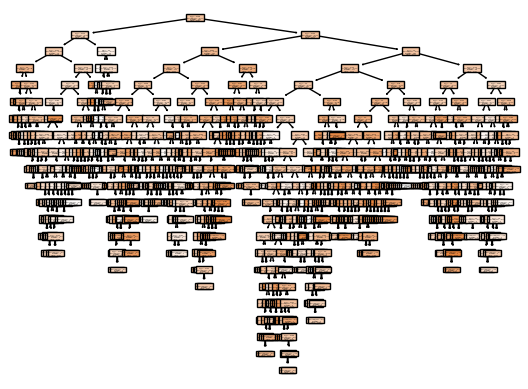

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [40]:
# Select the best model
best_model = linreg_model if linreg_mse < rf_mse else rf_model

In [41]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
